# Regression Analysis on House price prediction


## Introduction

In [ ]:
House price prediction can help the developer to determine the selling price of a house and can help the customer to arrange
the right time to purchase the house.To predict the sale price ,we are using linear regression algorithm.To identify the variables affecting the
house prices such as area,number of rooms etc.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Read the File.

In [3]:
df=pd.read_csv("C:/Users/sruthy/Desktop/House_price.csv")

## view the file

In [6]:
df

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4543,84556.63627,5.092459,6.723412,2.42,31797.31744,1.326847e+06,"97160 Tracy Junction\nErinborough, WY 73884"
4544,82732.98111,5.332712,6.198476,3.49,41136.52722,1.252664e+06,"0630 Wilson Shoal\nNorth Philip, AK 91611"
4545,65694.05127,6.436741,6.704929,3.14,43406.71203,1.359763e+06,"PSC 2681, Box 5759\nAPO AA 82431-2879"
4546,76061.35071,7.148713,7.546066,6.30,40876.96459,1.778013e+06,"04117 Bennett Greens\nGonzalezfort, NJ 86640-8362"


## Show the top 10 records.

In [4]:
df.head(10)

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


## Show the bottom 10 records. 

In [5]:
df.tail(10)

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
4538,74497.67308,6.166026,8.142658,4.01,28160.45754,1.204753e+06,"03161 Lori Meadows Suite 563\nAndersonfurt, MT..."
4539,70073.50299,5.887433,7.222302,5.14,40109.82955,1.441527e+06,"3670 Edward Prairie\nAmandafurt, NV 40043-0962"
4540,86458.98086,4.555123,8.280669,6.27,22321.43516,1.336743e+06,"54374 Rosario Hills Apt. 037\nAlecfurt, VI 741..."
4541,56894.40224,5.292656,6.252545,3.10,32478.66494,7.427053e+05,"9495 Randall Forges\nPort Nicholas, WA 94825"
4542,58153.22930,5.643086,6.751951,3.39,45756.53195,1.150439e+06,"4771 Thomas Drive Apt. 125\nEast Lauren, GA 99732"
4543,84556.63627,5.092459,6.723412,2.42,31797.31744,1.326847e+06,"97160 Tracy Junction\nErinborough, WY 73884"
4544,82732.98111,5.332712,6.198476,3.49,41136.52722,1.252664e+06,"0630 Wilson Shoal\nNorth Philip, AK 91611"
4545,65694.05127,6.436741,6.704929,3.14,43406.71203,1.359763e+06,"PSC 2681, Box 5759\nAPO AA 82431-2879"
4546,76061.35071,7.148713,7.546066,6.30,40876.96459,1.778013e+06,"04117 Bennett Greens\nGonzalezfort, NJ 86640-8362"
4547,66935.47508,6.376390,8.513826,5.47,17573.61710,1.109059e+06,55454 M


## find the dimension of dataset

In [6]:
df.shape

(4548, 7)

## Information about the Dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg. Area Income    4548 non-null   float64
 1   House Age           4548 non-null   float64
 2   Number of Rooms     4548 non-null   float64
 3   Number of Bedrooms  4548 non-null   float64
 4   Area Population     4548 non-null   float64
 5   Price               4548 non-null   float64
 6   Address             4548 non-null   object 
dtypes: float64(6), object(1)
memory usage: 248.8+ KB


## Check the null values.

In [8]:
df.isnull().sum()

Avg. Area Income      0
House Age             0
Number of Rooms       0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
dtype: int64

## Statistical Information about the Dataset.¶

In [9]:
df.describe()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,68611.700818,5.978918,6.987646,3.981693,36187.469334,1.233916e+06
std,10686.487761,0.990850,1.006587,1.230939,9910.189915,3.545676e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150193,5.332187,6.299692,3.140000,29423.163510,9.977751e+05
50%,68817.036575,5.960872,7.002245,4.050000,36215.560985,1.234571e+06
75%,75820.741747,6.658368,7.665871,4.490000,42880.554642,1.470616e+06
max,107701.748400,9.519088,10.759588,6.500000,69592.040240,2.469066e+06


## Histogram of house price prediction.

array([[<AxesSubplot:title={'center':'Avg. Area Income'}>,
        <AxesSubplot:title={'center':'House Age'}>],
       [<AxesSubplot:title={'center':'Number of Rooms'}>,
        <AxesSubplot:title={'center':'Number of Bedrooms'}>],
       [<AxesSubplot:title={'center':'Area Population'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

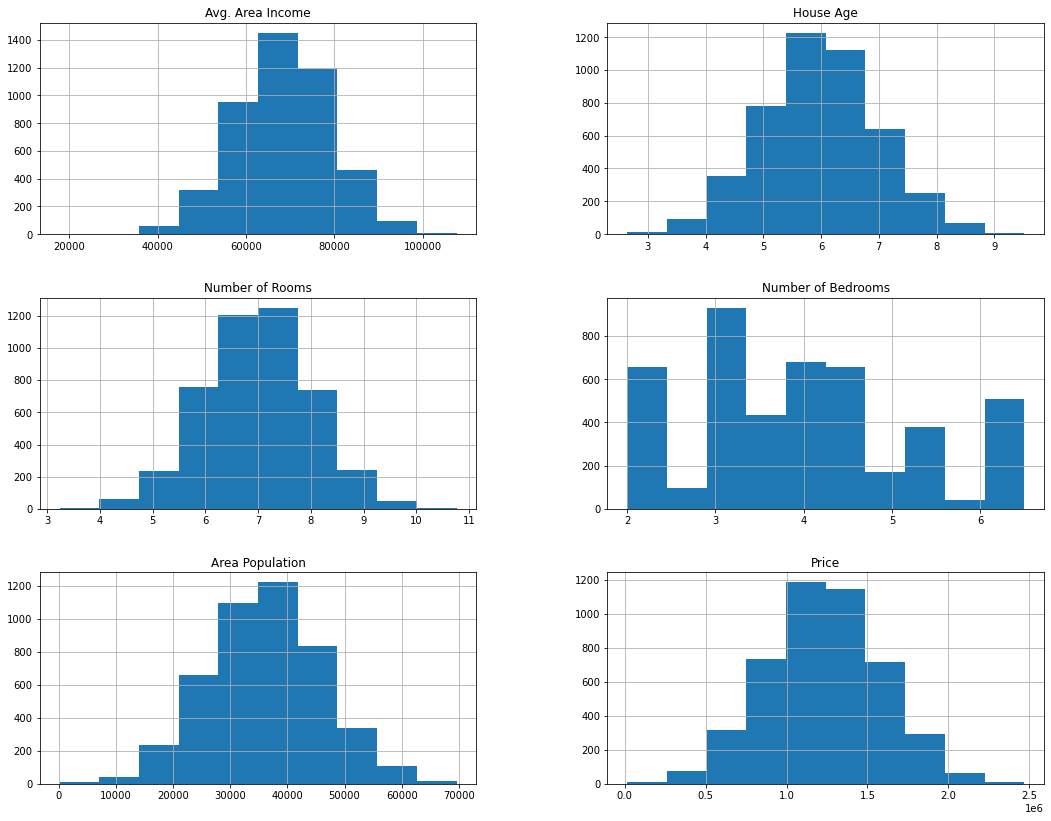

In [10]:
df.hist(figsize=(18,14))

## Distribution Graph of Average  Area Income.

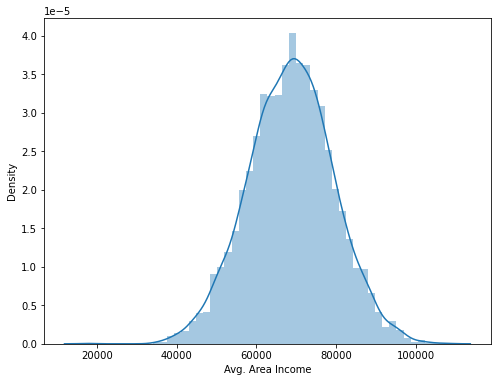

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df["Avg. Area Income"])
plt.show()

## Distribution Graph of Average  population.

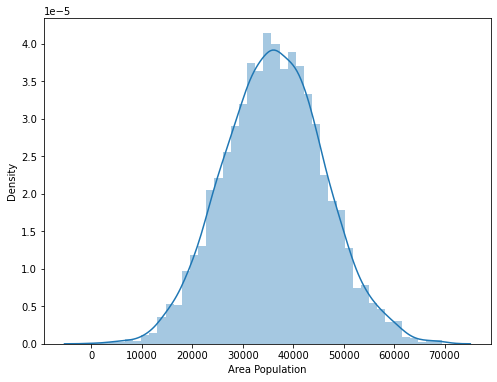

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(df["Area Population"])
plt.show()

## Distribution Graph of Average price

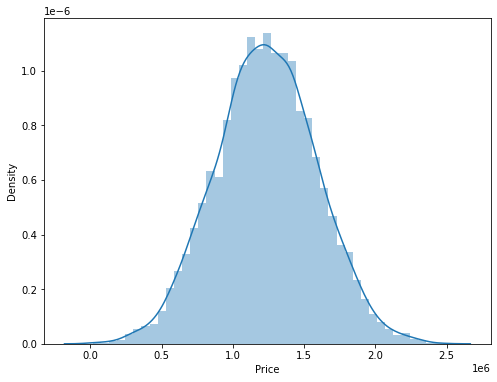

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df["Price"])
plt.show()

## Pairplot of Climate Attributes.

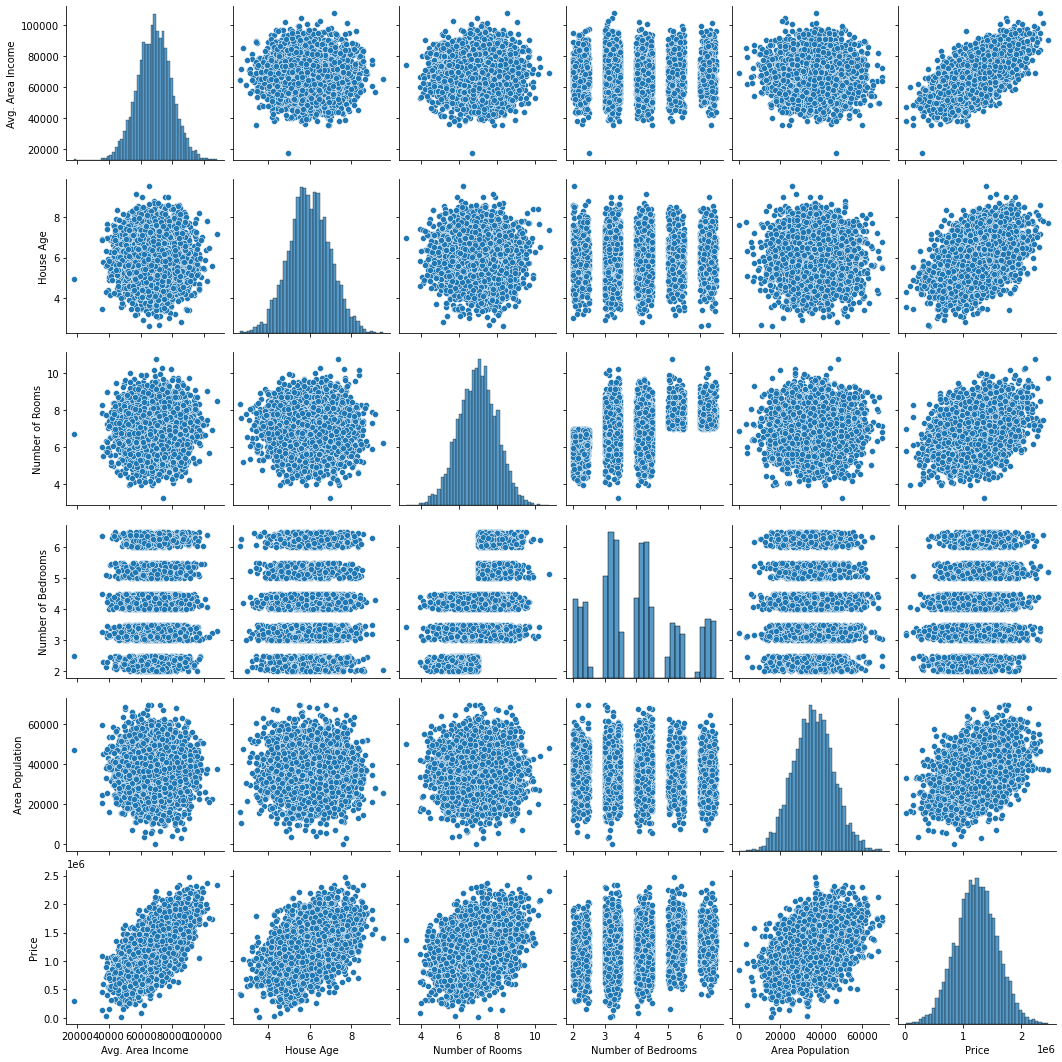

In [15]:
sns.pairplot(df)

## Scatterplot of  House Age v/s Price .

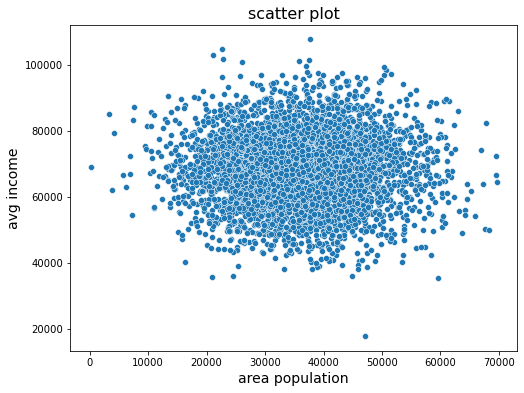

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=df["Avg. Area Income"],x=df["Area Population"])
plt.title("scatter plot",size=16)
plt.ylabel("avg income",size=14)
plt.xlabel("area population",size=14)
plt.show()

## Heat map shows the relationships between the house price data prediction

<AxesSubplot:>

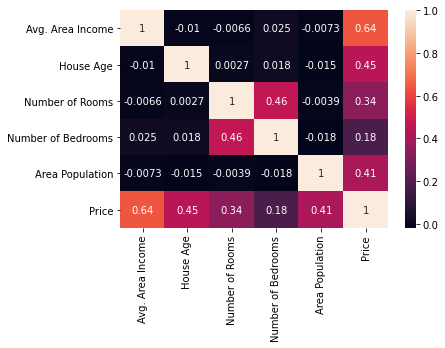

In [23]:
sns.heatmap(df.corr(),annot=True)

x=df.iloc[:,-6:-5].values
y=df.iloc[:,4].values

In [21]:
x

array([[5.68286132],
       [6.00289981],
       [5.86588984],
       ...,
       [6.43674058],
       [7.14871312],
       [6.37638969]])

In [22]:
y

array([23086.8005 , 40173.07217, 36882.1594 , ..., 43406.71203,
       40876.96459, 17573.6171 ])

## Performing the T-Test.¶

## Train-Test-Split Evaluation.¶

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4093, 1)
(455, 1)
(4093,)
(455,)


In [32]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

5.97439114131957
6.019644194424177
36151.92058935775
36507.251773116484


In [26]:
l=LinearRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


In [27]:
y_pred=l.predict(x_test)

In [28]:
d1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
0,51614.83014,36024.213752
1,34043.22655,36494.220964
2,27865.33079,36258.228775
3,49307.20981,36278.076330
4,27370.18572,36337.061210
...,...,...
450,27854.68792,36119.894971
451,26341.09557,35984.514511
452,36565.02983,35941.727921
453,45281.18657,35786.468355


In [29]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 7961.34939668077


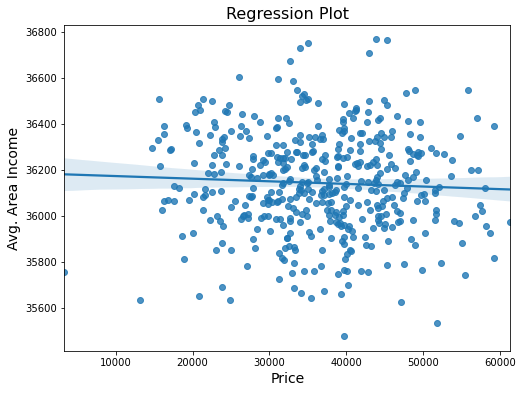

In [31]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test,y=y_pred)
plt.title("Regression Plot",size=16)
plt.ylabel("Avg. Area Income",size=14)
plt.xlabel("Price",size=14)
plt.show()

## Regression plot

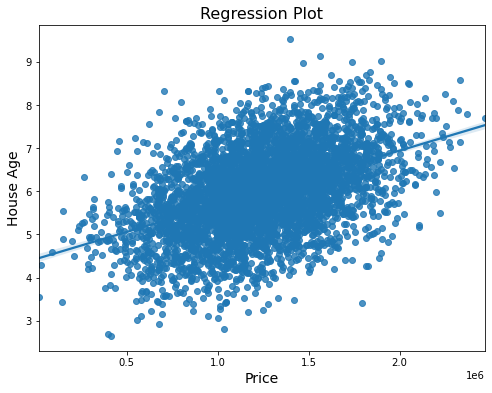

In [34]:
plt.figure(figsize=(8,6))
sns.regplot(y=df["House Age"],x=df["Price"])
plt.title("Regression Plot",size=16)
plt.ylabel("House Age",size=14)
plt.xlabel("Price",size=14)
plt.show()


## Conclusion

In [ ]:
Done the house sale price prediction using linear regression.It is a supervised machine learning algorithm where the predicted output
is continous and a constant slope.Identified the variables affecting house prices and predicted the accuracy of the model and plotted the 
regression plot etc.

## Reference

In [ ]:
www.kaggle.com

In [ ]:
www.encyclopedia.com